# _Initialisation of Variables_

#### Imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.stats.api import ols
import warnings
warnings.filterwarnings('ignore')
data = pd.read_json("LOLFullDB.json")

In [3]:
data = data[pd.notnull(data['rank'])]
len(data)

7873

#### Arrays

In [4]:
rank = [x for x in data['rank']] 
level = [x for x in data['level']] 
comp = [x for x in data.get('comp', {})]
qp = [x for x in data.get('qp', {})]
heroes = [x for x in data.get('heroes', {})]
[len(rank), len(level), len(comp), len(qp), len(heroes)]

[7873, 7873, 7873, 7873, 7873]

#### Functions

In [5]:
def getCompWins(x):
    b = x.get('total', {})
    return(b.get('wins', {}))
def getWinRate(x):
    b = x.get('total', {})
    return(b.get('rate', {}))
def getAvgElims(x):
    b = x.get('average', {})
    return(b.get('elims', {}))
def getTotalElims(x):
    b = x.get('total', {})
    return(b.get('elims', {}))
def getMostElims(x):
    b = x.get('most', {})
    return(b.get('elims', {}))
def getGames(x):
    b = x.get('total',{})
    return(b.get('games',{}))
def getAna(x):
    b = x.get('playtime',{})
    return(b.get('ana',{}))
def getBastion(x):
    b = x.get('playtime',{})
    return(b.get('bastion',{}))
def getDva(x):
    b = x.get('playtime',{})
    return(b.get('dva',{}))
def getGenji(x):
    b = x.get('playtime',{})
    return(b.get('genji',{}))
def getHanzo(x):
    b = x.get('playtime',{})
    return(b.get('hanzo',{}))
def getJunkrat(x):
    b = x.get('playtime',{})
    return(b.get('junkrat',{}))
def getLucio(x):
    b = x.get('playtime',{})
    return(b.get('lucio',{}))
def getMccree(x):
    b = x.get('playtime',{})
    return(b.get('mccree',{}))
def getMei(x):
    b = x.get('playtime',{})
    return(b.get('mei',{}))
def getMercy(x):
    b = x.get('playtime',{})
    return(b.get('mercy',{}))
def getOrisa(x):
    b = x.get('playtime',{})
    return(b.get('orisa',{}))
def getPharah(x):
    b = x.get('playtime',{})
    return(b.get('pharah',{}))
def getReaper(x):
    b = x.get('playtime',{})
    return(b.get('reaper',{}))
def getReinhardt(x):
    b = x.get('playtime',{})
    return(b.get('reinhardt',{}))
def getRoadhog(x):
    b = x.get('playtime',{})
    return(b.get('roadhog',{}))
def getSoldier76(x):
    b = x.get('playtime',{})
    return(b.get('soldier76',{}))
def getSombra(x):
    b = x.get('playtime',{})
    return(b.get('sombra',{}))
def getSymmetra(x):
    b = x.get('playtime',{})
    return(b.get('symmetra',{}))
def getTorbjorn(x):
    b = x.get('playtime',{})
    return(b.get('torbjorn',{}))
def getTracer(x):
    b = x.get('playtime',{})
    return(b.get('tracer',{}))
def getWidowmaker(x):
    b = x.get('playtime',{})
    return(b.get('widowmaker',{}))
def getWinston(x):
    b = x.get('playtime',{})
    return(b.get('winston',{}))
def getZarya(x):
    b = x.get('playtime',{})
    return(b.get('zarya',{}))
def getZenyatta(x):
    b = x.get('playtime',{})
    return(b.get('zenyatta',{}))
def filterNaN(x):
    if x < 1e100:
        return(x)
    else:
        return(0)
def filterLowRank(x):
    if x > 0 and x < 1666:
        return(x)
    else:
        return(0)
def filterMedRank(x):
    if x > 1666 and x < 3332:
        return(x)
    else:
        return(0)
def filterHighRank(x):
    if x > 3332 and x < 5001:
        return(x)
    else:
        return(0)
def filterFloats(x):
    if type(x) == float:
        return(x)
    else:
        return(0)
def filterInts(x):
    if type(x) == int:
        return(x)
    else:
        return(0)

#### Parameters

In [6]:
compWins = [getCompWins(x) for x in  comp]
qpGames = [getGames(x) for x in  qp]
anaHours = [getAna(x) for x in heroes]
bastionHours = [getBastion(x) for x in heroes]
dvaHours = [getDva(x) for x in heroes]
genjiHours = [getGenji(x) for x in heroes]
hanzoHours = [getHanzo(x) for x in heroes]
junkratHours = [getJunkrat(x) for x in heroes]
lucioHours = [getLucio(x) for x in heroes]
mccreeHours = [getMccree(x) for x in heroes]
meiHours = [getMei(x) for x in heroes]
mercyHours = [getMercy(x) for x in heroes]
orisaHours = [getOrisa(x) for x in heroes]
pharahHours = [getPharah(x) for x in heroes]
reaperHours = [getReaper(x) for x in heroes]
reinhardtHours = [getReinhardt(x) for x in heroes]
roadhogHours = [getRoadhog(x) for x in heroes]
soldier76Hours = [getSoldier76(x) for x in heroes]
sombraHours = [getSombra(x) for x in heroes]
symmetraHours = [getSymmetra(x) for x in heroes]
torbjornHours = [getTorbjorn(x) for x in heroes]
tracerHours = [getTracer(x) for x in heroes]
widowmakerHours = [getWidowmaker(x) for x in heroes]
winstonHours = [getWinston(x) for x in heroes]
zaryaHours = [getZarya(x) for x in heroes]
zenyattaHours = [getZenyatta(x) for x in heroes]
rank=[filterNaN(x) for x in rank]
levelFiltered= [filterNaN(x) for x in level]
lowRank = [filterLowRank(x) for x in rank]
medRank = [filterMedRank(x) for x in rank]
highRank = [filterHighRank(x) for x in rank]
avg = [getAvgElims(x) for x in comp]
total = [getTotalElims(x) for x in comp]
most = [getMostElims(x) for x in comp]
avgElims = [filterFloats(x) for x in avg]
totalElims = [filterInts(x) for x in total]
mostElims = [filterInts(x) for x in most]
winRate = [getWinRate(x) for x in comp]

In [8]:
df = pd.DataFrame({"Rank": rank, "Level": level, "Comp Wins": compWins, "Quick Games": qpGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Orisa": orisaHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Level','Comp Wins', 'Quick Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Orisa', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Level> + <Comp Wins> + <Quick Games> + <Ana> + <Bastion> + <D.Va>
             + <Genji> + <Hanzo> + <Junkrat> + <Lucio> + <McCree> + <Mei>
             + <Mercy> + <Orisa> + <Pharah> + <Reaper> + <Reinhardt> + <Roadhog>
             + <Soldier76> + <Sombra> + <Symmetra> + <Torbjorn> + <Tracer>
             + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta> + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   28

R-squared:         0.2326
Adj R-squared:     0.2300

Rmse:           1159.9396

F-stat (27, 7842):    88.0530, p-value:     0.0000

Degrees of Freedom: model 27, resid 7842

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Level    -0.4520     0.4642   

# Analytics

## Sample size of 8630 players

### MLS Fit for all set of parameters

In [7]:
df = pd.DataFrame({"Rank": rank, "Level": level, "Comp Wins": compWins, "Quick Games": qpGames, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Orisa": orisaHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Level','Comp Wins', 'Quick Games', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Orisa', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Level> + <Comp Wins> + <Quick Games> + <Ana> + <Bastion> + <D.Va>
             + <Genji> + <Hanzo> + <Junkrat> + <Lucio> + <McCree> + <Mei>
             + <Mercy> + <Orisa> + <Pharah> + <Reaper> + <Reinhardt> + <Roadhog>
             + <Soldier76> + <Sombra> + <Symmetra> + <Torbjorn> + <Tracer>
             + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta> + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   28

R-squared:         0.2326
Adj R-squared:     0.2300

Rmse:           1159.9396

F-stat (27, 7842):    88.0530, p-value:     0.0000

Degrees of Freedom: model 27, resid 7842

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Level    -0.4520     0.4642   

#### MLS Fit for Competitive Games and All Heroes (minus Orisa/Quickplay)

In [8]:
df = pd.DataFrame({"Rank": rank, "Comp Wins": compWins, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Wins', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Wins> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Sombra> + <Symmetra>
             + <Torbjorn> + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   25

R-squared:         0.2315
Adj R-squared:     0.2292

Rmse:           1160.5743

F-stat (24, 7845):    98.4691, p-value:     0.0000

Degrees of Freedom: model 24, resid 7845

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Comp Wins     1.8128     0.2220       8.17     0.0000     1.3777     2

#### MLS Fit for Low Ranked Players 0 - 1666 SR

In [9]:
df = pd.DataFrame({"Rank": lowRank, "Comp Wins": compWins, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Wins', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Wins> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Sombra> + <Symmetra>
             + <Torbjorn> + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   25

R-squared:         0.0607
Adj R-squared:     0.0579

Rmse:            382.7377

F-stat (24, 7845):    21.1387, p-value:     0.0000

Degrees of Freedom: model 24, resid 7845

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Comp Wins    -0.4124     0.0732      -5.63     0.0000    -0.5559    -0

#### MLS Fit for Medium Ranked Players 1666 - 3332 SR

In [10]:
df = pd.DataFrame({"Rank": medRank, "Comp Wins": compWins, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Wins', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Wins> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Sombra> + <Symmetra>
             + <Torbjorn> + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   25

R-squared:         0.0864
Adj R-squared:     0.0836

Rmse:           1229.7668

F-stat (24, 7845):    30.9214, p-value:     0.0000

Degrees of Freedom: model 24, resid 7845

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Comp Wins    -1.9140     0.2352      -8.14     0.0000    -2.3750    -1

#### MLS Fit for High Ranked Players 3332 - 5000 SR

In [11]:
df = pd.DataFrame({"Rank": highRank, "Comp Wins": compWins, "Ana": anaHours, "Bastion": bastionHours, "D.Va": dvaHours, "Genji": genjiHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Lucio": lucioHours, "McCree": mccreeHours, "Mei": meiHours, "Mercy": mercyHours, "Pharah": pharahHours, "Reaper": reaperHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Symmetra": symmetraHours, "Torbjorn": torbjornHours, "Tracer": tracerHours, "Widowmaker": widowmakerHours, "Winston": winstonHours, "Zarya": zaryaHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Comp Wins', 'Ana', 'Bastion', 'D.Va', 'Genji', 'Hanzo', 'Junkrat', 'Lucio', 'McCree', 'Mei', 'Mercy', 'Pharah', 'Reaper', 'Reinhardt', 'Roadhog', 'Soldier76', 'Sombra', 'Symmetra', 'Torbjorn', 'Tracer', 'Widowmaker', 'Winston', 'Zarya', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Comp Wins> + <Ana> + <Bastion> + <D.Va> + <Genji> + <Hanzo>
             + <Junkrat> + <Lucio> + <McCree> + <Mei> + <Mercy> + <Pharah> + <Reaper>
             + <Reinhardt> + <Roadhog> + <Soldier76> + <Sombra> + <Symmetra>
             + <Torbjorn> + <Tracer> + <Widowmaker> + <Winston> + <Zarya> + <Zenyatta>
             + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   25

R-squared:         0.2819
Adj R-squared:     0.2797

Rmse:           1673.1881

F-stat (24, 7845):   128.3151, p-value:     0.0000

Degrees of Freedom: model 24, resid 7845

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Comp Wins     4.1392     0.3201      12.93     0.0000     3.5118     4

#### MLS Fit for Elimations

In [12]:
df = pd.DataFrame({"Rank": rank, "Avg Elims": avgElims, "Total Elims": totalElims, "Most Elims": mostElims})
res = ols(y = df['Rank'], x = df[['Avg Elims', 'Total Elims', 'Most Elims']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Avg Elims> + <Total Elims> + <Most Elims> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   4

R-squared:         0.0948
Adj R-squared:     0.0945

Rmse:           1258.5762

F-stat (3, 7869):   274.8611, p-value:     0.0000

Degrees of Freedom: model 3, resid 7869

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Avg Elims    38.1039     2.4664      15.45     0.0000    33.2698    42.9381
   Total Elims     0.0661     0.0054      12.16     0.0000     0.0555     0.0768
    Most Elims     1.2263     1.4681       0.84     0.4035    -1.6510     4.1037
     intercept  1627.8030    63.4139      25.67     0.0000  1503.5117  1752.0943
---------------------------------En

#### MLS Fit for Elimations against Role (Offense)

In [13]:
df = pd.DataFrame({"Avg Elims": avgElims, "Genji": genjiHours, "McCree": mccreeHours, "Pharah": pharahHours, "Reaper": reaperHours, "Soldier76": soldier76Hours, "Sombra": sombraHours, "Tracer": tracerHours})
res = ols(y = df['Avg Elims'], x = df[['Genji', 'McCree', 'Pharah', 'Reaper', 'Soldier76', 'Sombra', 'Tracer']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Genji> + <McCree> + <Pharah> + <Reaper> + <Soldier76> + <Sombra>
             + <Tracer> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   8

R-squared:         0.1173
Adj R-squared:     0.1165

Rmse:              6.9353

F-stat (7, 7865):   149.3331, p-value:     0.0000

Degrees of Freedom: model 7, resid 7865

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Genji     0.0396     0.0042       9.50     0.0000     0.0314     0.0477
        McCree     0.0904     0.0068      13.28     0.0000     0.0771     0.1038
        Pharah     0.0244     0.0066       3.69     0.0002     0.0114     0.0373
        Reaper     0.0025     0.0094       0.27     0.7875    -0.0158

#### MLS Fit for Elimations against Role (Defense)

In [14]:
df = pd.DataFrame({"Avg Elims": avgElims, "Bastion": bastionHours, "Hanzo": hanzoHours, "Junkrat": junkratHours, "Mei": meiHours, "Torbjorn": torbjornHours, "Widowmaker": widowmakerHours, })
res = ols(y = df['Avg Elims'], x = df[['Bastion', 'Hanzo', 'Junkrat', 'Mei', 'Torbjorn', 'Widowmaker']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Bastion> + <Hanzo> + <Junkrat> + <Mei> + <Torbjorn> + <Widowmaker>
             + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   7

R-squared:         0.0296
Adj R-squared:     0.0288

Rmse:              7.2714

F-stat (6, 7866):    39.9288, p-value:     0.0000

Degrees of Freedom: model 6, resid 7866

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Bastion     0.0555     0.0167       3.31     0.0009     0.0227     0.0883
         Hanzo     0.0818     0.0081      10.09     0.0000     0.0659     0.0977
       Junkrat    -0.0506     0.0090      -5.63     0.0000    -0.0682    -0.0330
           Mei    -0.0734     0.0124      -5.92     0.0000    -0.0976    -0.04

#### MLS Fit for Eliminations against Role (Tank)

In [15]:
df = pd.DataFrame({"Avg Elims": avgElims, "D.Va": dvaHours, "Reinhardt": reinhardtHours, "Roadhog": roadhogHours, "Winston": winstonHours, "Zarya": zaryaHours})
res = ols(y = df['Avg Elims'], x = df[['D.Va', 'Reinhardt', 'Roadhog', 'Winston', 'Zarya']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <D.Va> + <Reinhardt> + <Roadhog> + <Winston> + <Zarya>
             + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   6

R-squared:         0.0543
Adj R-squared:     0.0537

Rmse:              7.1776

F-stat (5, 7867):    90.3517, p-value:     0.0000

Degrees of Freedom: model 5, resid 7867

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          D.Va    -0.0598     0.0061      -9.75     0.0000    -0.0718    -0.0477
     Reinhardt    -0.0569     0.0081      -7.06     0.0000    -0.0727    -0.0411
       Roadhog     0.1018     0.0074      13.75     0.0000     0.0873     0.1163
       Winston     0.0259     0.0175       1.48     0.1387    -0.0084     0.0601
         Z

#### MLS Fit for Eliminations against Role (Support)

In [16]:
df = pd.DataFrame({"Avg Elims": avgElims, "Ana": anaHours, "Lucio": lucioHours, "Mercy": mercyHours, "Symmetra": symmetraHours, "Zenyatta": zenyattaHours})
res = ols(y = df['Avg Elims'], x = df[['Ana', 'Lucio', 'Mercy', 'Symmetra', 'Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Ana> + <Lucio> + <Mercy> + <Symmetra> + <Zenyatta> + <intercept>

Number of Observations:         7870
Number of Degrees of Freedom:   6

R-squared:         0.1359
Adj R-squared:     0.1353

Rmse:              6.8576

F-stat (5, 7864):   247.2766, p-value:     0.0000

Degrees of Freedom: model 5, resid 7864

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Ana     0.0040     0.0085       0.47     0.6376    -0.0126     0.0206
         Lucio    -0.0548     0.0056      -9.85     0.0000    -0.0657    -0.0439
         Mercy    -0.0805     0.0028     -28.85     0.0000    -0.0860    -0.0750
      Symmetra    -0.0273     0.0105      -2.59     0.0096    -0.0479    -0.0066
      Zenyatta     0.0089 

### Individual Hero Playtime vs Rank

##### Ana

In [17]:
df = pd.DataFrame({"Rank": rank, "Ana": anaHours})
res = ols(y = df['Rank'], x = df[['Ana']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Ana> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0625
Adj R-squared:     0.0624

Rmse:           1280.7261

F-stat (1, 7871):   524.4768, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Ana    32.7604     1.4305      22.90     0.0000    29.9566    35.5642
     intercept  2520.2980    16.4500     153.21     0.0000  2488.0560  2552.5400
---------------------------------End of Summary---------------------------------

##### Bastion

In [18]:
df = pd.DataFrame({"Rank": rank, "Bastion": bastionHours})
res = ols(y = df['Rank'], x = df[['Bastion']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Bastion> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0061
Adj R-squared:     0.0060

Rmse:           1318.6717

F-stat (1, 7871):    48.2585, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Bastion    20.3431     2.9284       6.95     0.0000    14.6034    26.0827
     intercept  2635.3458    17.6126     149.63     0.0000  2600.8252  2669.8664
---------------------------------End of Summary---------------------------------

##### D.Va

In [19]:
df = pd.DataFrame({"Rank": rank, "D.Va": dvaHours})
res = ols(y = df['Rank'], x = df[['D.Va']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <D.Va> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0030
Adj R-squared:     0.0028

Rmse:           1320.7405

F-stat (1, 7871):    23.4681, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          D.Va     5.3461     1.1036       4.84     0.0000     3.1831     7.5091
     intercept  2665.0936    16.6287     160.27     0.0000  2632.5013  2697.6859
---------------------------------End of Summary---------------------------------

##### Genji

In [20]:
df = pd.DataFrame({"Rank": rank, "Genji": genjiHours})
res = ols(y = df['Rank'], x = df[['Genji']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Genji> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0889
Adj R-squared:     0.0887

Rmse:           1262.5723

F-stat (1, 7871):   767.6393, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Genji    18.5524     0.6696      27.71     0.0000    17.2400    19.8648
     intercept  2486.8636    16.1930     153.58     0.0000  2455.1254  2518.6019
---------------------------------End of Summary---------------------------------

##### Hanzo

In [21]:
df = pd.DataFrame({"Rank": rank, "Hanzo": hanzoHours})
res = ols(y = df['Rank'], x = df[['Hanzo']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Hanzo> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0490
Adj R-squared:     0.0489

Rmse:           1289.8937

F-stat (1, 7871):   405.5637, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Hanzo    27.2234     1.3518      20.14     0.0000    24.5738    29.8729
     intercept  2524.2063    16.9825     148.64     0.0000  2490.9206  2557.4920
---------------------------------End of Summary---------------------------------

##### Junkrat

In [22]:
df = pd.DataFrame({"Rank": rank, "Junkrat": junkratHours})
res = ols(y = df['Rank'], x = df[['Junkrat']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Junkrat> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0000
Adj R-squared:    -0.0001

Rmse:           1322.6993

F-stat (1, 7871):     0.1042, p-value:     0.7469

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Junkrat    -0.4946     1.5321      -0.32     0.7469    -3.4974     2.5083
     intercept  2703.5029    16.7957     160.96     0.0000  2670.5833  2736.4225
---------------------------------End of Summary---------------------------------

##### Lucio

In [23]:
df = pd.DataFrame({"Rank": rank, "Lucio": lucioHours})
res = ols(y = df['Rank'], x = df[['Lucio']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Lucio> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0014
Adj R-squared:     0.0013

Rmse:           1321.7714

F-stat (1, 7871):    11.1584, p-value:     0.0008

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Lucio     3.3443     1.0011       3.34     0.0008     1.3820     5.3065
     intercept  2673.6827    16.9944     157.33     0.0000  2640.3737  2706.9917
---------------------------------End of Summary---------------------------------

##### McCree

In [24]:
df = pd.DataFrame({"Rank": rank, "McCree": mccreeHours})
res = ols(y = df['Rank'], x = df[['McCree']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <McCree> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.1241
Adj R-squared:     0.1240

Rmse:           1237.9241

F-stat (1, 7871):  1115.0714, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        McCree    33.2418     0.9955      33.39     0.0000    31.2906    35.1929
     intercept  2400.5641    16.6011     144.60     0.0000  2368.0260  2433.1023
---------------------------------End of Summary---------------------------------

##### Mei

In [25]:
df = pd.DataFrame({"Rank": rank, "Mei": meiHours})
res = ols(y = df['Rank'], x = df[['Mei']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Mei> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0249
Adj R-squared:     0.0248

Rmse:           1306.1066

F-stat (1, 7871):   201.3622, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           Mei    30.0298     2.1162      14.19     0.0000    25.8820    34.1776
     intercept  2577.5312    17.0995     150.74     0.0000  2544.0163  2611.0462
---------------------------------End of Summary---------------------------------

##### Mercy

In [26]:
df = pd.DataFrame({"Rank": rank, "Mercy": mercyHours})
res = ols(y = df['Rank'], x = df[['Mercy']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Mercy> + <intercept>

Number of Observations:         7872
Number of Degrees of Freedom:   2

R-squared:         0.0084
Adj R-squared:     0.0083

Rmse:           1316.9037

F-stat (1, 7870):    66.5478, p-value:     0.0000

Degrees of Freedom: model 1, resid 7870

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Mercy     4.0307     0.4941       8.16     0.0000     3.0623     4.9991
     intercept  2661.2665    15.6344     170.22     0.0000  2630.6230  2691.9099
---------------------------------End of Summary---------------------------------

##### Orisa

In [27]:
df = pd.DataFrame({"Rank": rank, "Orisa": orisaHours})
res = ols(y = df['Rank'], x = df[['Orisa']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Orisa> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0060
Adj R-squared:     0.0059

Rmse:           1318.7434

F-stat (1, 7871):    47.3971, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Orisa   155.3470    22.5646       6.88     0.0000   111.1205   199.5735
     intercept  2672.5276    15.4273     173.23     0.0000  2642.2901  2702.7652
---------------------------------End of Summary---------------------------------

##### Pharah

In [28]:
df = pd.DataFrame({"Rank": rank, "Pharah": pharahHours})
res = ols(y = df['Rank'], x = df[['Pharah']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Pharah> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0173
Adj R-squared:     0.0171

Rmse:           1311.2359

F-stat (1, 7871):   138.3303, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Pharah    14.1374     1.2020      11.76     0.0000    11.7814    16.4933
     intercept  2602.6242    16.9810     153.27     0.0000  2569.3415  2635.9069
---------------------------------End of Summary---------------------------------

##### Reaper

In [29]:
df = pd.DataFrame({"Rank": rank, "Reaper": reaperHours})
res = ols(y = df['Rank'], x = df[['Reaper']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Reaper> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0079
Adj R-squared:     0.0077

Rmse:           1317.4951

F-stat (1, 7871):    62.4089, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Reaper    13.0869     1.6566       7.90     0.0000     9.8400    16.3338
     intercept  2625.9272    17.6293     148.95     0.0000  2591.3738  2660.4807
---------------------------------End of Summary---------------------------------

##### Reinhardt

In [30]:
df = pd.DataFrame({"Rank": rank, "Reinhardt": reinhardtHours})
res = ols(y = df['Rank'], x = df[['Reinhardt']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Reinhardt> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0148
Adj R-squared:     0.0147

Rmse:           1312.8863

F-stat (1, 7871):   118.2063, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Reinhardt    14.1923     1.3054      10.87     0.0000    11.6338    16.7508
     intercept  2600.9169    17.4265     149.25     0.0000  2566.7610  2635.0727
---------------------------------End of Summary---------------------------------

##### Roadhog

In [31]:
df = pd.DataFrame({"Rank": rank, "Roadhog": roadhogHours})
res = ols(y = df['Rank'], x = df[['Roadhog']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Roadhog> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0679
Adj R-squared:     0.0677

Rmse:           1277.0356

F-stat (1, 7871):   573.0711, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Roadhog    28.2518     1.1802      23.94     0.0000    25.9387    30.5649
     intercept  2481.4778    17.0656     145.41     0.0000  2448.0292  2514.9264
---------------------------------End of Summary---------------------------------

##### Soldier76

In [32]:
df = pd.DataFrame({"Rank": rank, "Soldier76": soldier76Hours})
res = ols(y = df['Rank'], x = df[['Soldier76']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Soldier76> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0282
Adj R-squared:     0.0281

Rmse:           1303.9184

F-stat (1, 7871):   228.4783, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     Soldier76    20.0646     1.3274      15.12     0.0000    17.4629    22.6664
     intercept  2532.4655    18.4466     137.29     0.0000  2496.3101  2568.6209
---------------------------------End of Summary---------------------------------

##### Sombra

In [33]:
df = pd.DataFrame({"Rank": rank, "Sombra": sombraHours})
res = ols(y = df['Rank'], x = df[['Sombra']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Sombra> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0149
Adj R-squared:     0.0147

Rmse:           1312.8395

F-stat (1, 7871):   118.7757, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Sombra    33.9474     3.1149      10.90     0.0000    27.8423    40.0526
     intercept  2648.7650    15.5530     170.31     0.0000  2618.2812  2679.2489
---------------------------------End of Summary---------------------------------

##### Symmetra

In [34]:
df = pd.DataFrame({"Rank": rank, "Symmetra": symmetraHours})
res = ols(y = df['Rank'], x = df[['Symmetra']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Symmetra> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0033
Adj R-squared:     0.0031

Rmse:           1320.5400

F-stat (1, 7871):    25.8662, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Symmetra     9.6245     1.8924       5.09     0.0000     5.9154    13.3336
     intercept  2672.9061    15.8751     168.37     0.0000  2641.7909  2704.0213
---------------------------------End of Summary---------------------------------

##### Torbjorn

In [35]:
df = pd.DataFrame({"Rank": rank, "Torbjorn": torbjornHours})
res = ols(y = df['Rank'], x = df[['Torbjorn']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Torbjorn> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0003
Adj R-squared:     0.0002

Rmse:           1322.5163

F-stat (1, 7871):     2.2822, p-value:     0.1309

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Torbjorn     3.3079     2.1897       1.51     0.1309    -0.9839     7.5997
     intercept  2689.7508    16.6630     161.42     0.0000  2657.0913  2722.4104
---------------------------------End of Summary---------------------------------

##### Tracer

In [36]:
df = pd.DataFrame({"Rank": rank, "Tracer": tracerHours})
res = ols(y = df['Rank'], x = df[['Tracer']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Tracer> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0532
Adj R-squared:     0.0531

Rmse:           1287.0509

F-stat (1, 7871):   442.1663, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        Tracer    21.8761     1.0403      21.03     0.0000    19.8371    23.9152
     intercept  2534.7976    16.5190     153.45     0.0000  2502.4203  2567.1750
---------------------------------End of Summary---------------------------------

##### Widowmaker

In [37]:
df = pd.DataFrame({"Rank": rank, "Widowmaker": widowmakerHours})
res = ols(y = df['Rank'], x = df[['Widowmaker']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Widowmaker> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0492
Adj R-squared:     0.0491

Rmse:           1289.7504

F-stat (1, 7871):   407.4023, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    Widowmaker    20.9521     1.0380      20.18     0.0000    18.9175    22.9867
     intercept  2562.5056    16.0739     159.42     0.0000  2531.0008  2594.0104
---------------------------------End of Summary---------------------------------

##### Winston

In [38]:
df = pd.DataFrame({"Rank": rank, "Winston": winstonHours})
res = ols(y = df['Rank'], x = df[['Winston']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Winston> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0283
Adj R-squared:     0.0281

Rmse:           1303.8862

F-stat (1, 7871):   228.8782, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
       Winston    40.8878     2.7027      15.13     0.0000    35.5906    46.1850
     intercept  2579.7288    16.7393     154.11     0.0000  2546.9198  2612.5378
---------------------------------End of Summary---------------------------------

##### Zarya

In [39]:
df = pd.DataFrame({"Rank": rank, "Zarya": zaryaHours})
res = ols(y = df['Rank'], x = df[['Zarya']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Zarya> + <intercept>

Number of Observations:         7873
Number of Degrees of Freedom:   2

R-squared:         0.0527
Adj R-squared:     0.0526

Rmse:           1287.3746

F-stat (1, 7871):   437.9859, p-value:     0.0000

Degrees of Freedom: model 1, resid 7871

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         Zarya    26.7804     1.2796      20.93     0.0000    24.2723    29.2885
     intercept  2521.0245    16.8662     149.47     0.0000  2487.9668  2554.0821
---------------------------------End of Summary---------------------------------

##### Zenyatta

In [40]:
df = pd.DataFrame({"Rank": rank, "Zenyatta": zenyattaHours})
res = ols(y = df['Rank'], x = df[['Zenyatta']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Zenyatta> + <intercept>

Number of Observations:         7871
Number of Degrees of Freedom:   2

R-squared:         0.0113
Adj R-squared:     0.0112

Rmse:           1314.6808

F-stat (1, 7869):    90.3112, p-value:     0.0000

Degrees of Freedom: model 1, resid 7869

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
      Zenyatta    15.9872     1.6823       9.50     0.0000    12.6899    19.2845
     intercept  2624.1335    16.9166     155.12     0.0000  2590.9771  2657.2900
---------------------------------End of Summary---------------------------------

## Graphs

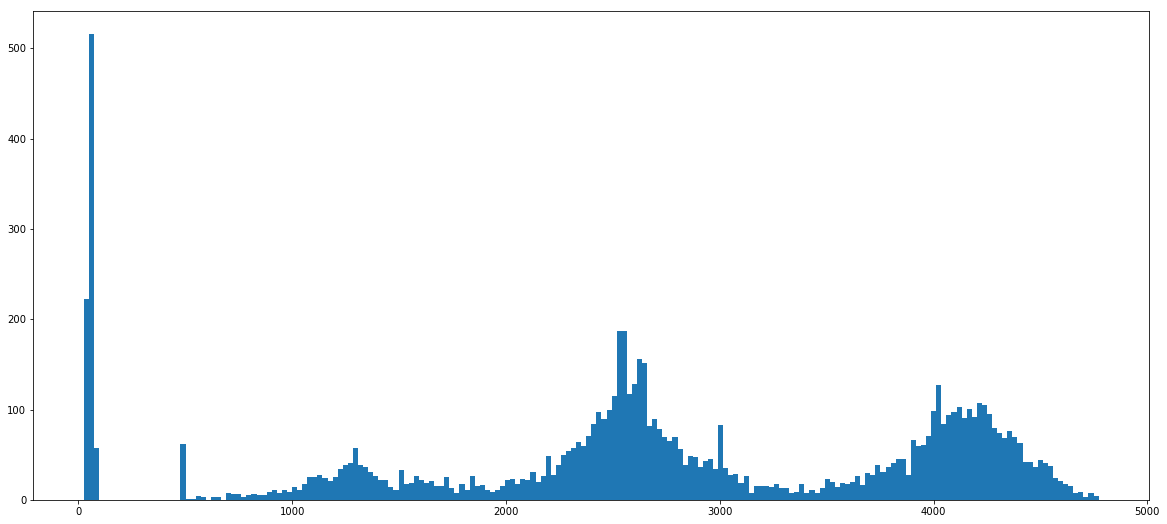

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
f=plt.figure(figsize=(20,9))
# bar = plt.bar(rank, avgElims)
plt.hist(rank, 200)
#plt.plot(rank)
plt.show()
# bar
# plt.show(bar)

In [54]:
zeros = [x for x in rank if x >= 0 and x <= 100]
zeros

[60.0,
 59.0,
 51.0,
 62.0,
 69.0,
 53.0,
 68.0,
 80.0,
 50.0,
 64.0,
 71.0,
 43.0,
 52.0,
 49.0,
 42.0,
 58.0,
 64.0,
 59.0,
 60.0,
 59.0,
 55.0,
 66.0,
 62.0,
 61.0,
 46.0,
 57.0,
 77.0,
 70.0,
 57.0,
 70.0,
 54.0,
 43.0,
 42.0,
 57.0,
 51.0,
 57.0,
 59.0,
 50.0,
 71.0,
 72.0,
 68.0,
 60.0,
 57.0,
 73.0,
 50.0,
 58.0,
 29.0,
 46.0,
 45.0,
 57.0,
 62.0,
 50.0,
 55.0,
 46.0,
 56.0,
 49.0,
 57.0,
 57.0,
 58.0,
 50.0,
 41.0,
 60.0,
 58.0,
 59.0,
 52.0,
 58.0,
 51.0,
 63.0,
 61.0,
 43.0,
 51.0,
 37.0,
 56.0,
 69.0,
 61.0,
 48.0,
 49.0,
 72.0,
 64.0,
 37.0,
 44.0,
 63.0,
 58.0,
 44.0,
 57.0,
 52.0,
 65.0,
 41.0,
 67.0,
 45.0,
 36.0,
 56.0,
 64.0,
 50.0,
 59.0,
 48.0,
 61.0,
 63.0,
 51.0,
 45.0,
 53.0,
 49.0,
 63.0,
 61.0,
 49.0,
 64.0,
 56.0,
 44.0,
 57.0,
 49.0,
 80.0,
 43.0,
 38.0,
 77.0,
 41.0,
 40.0,
 63.0,
 50.0,
 48.0,
 57.0,
 56.0,
 56.0,
 70.0,
 55.0,
 41.0,
 60.0,
 75.0,
 60.0,
 79.0,
 52.0,
 65.0,
 63.0,
 65.0,
 61.0,
 62.0,
 60.0,
 53.0,
 64.0,
 45.0,
 59.0,
 41.0,
 53.0,
 56.0,